# Import Libraries

**Import the usual libraries **

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

## Get the Data

** Use pandas to read driver-data.csv as a dataframe called df.**

In [0]:
df=pd.read_csv('shopping_data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
# Check the no. of records -- It should be 4000
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [0]:
# Check the Basic Distribution of Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Run the algorithm with K=2, which is the minimum number of clusters that can exist in a dataset.

In [0]:
# Using the KMeans from sklearn
from sklearn.cluster import KMeans

** Create an instance of a k-means model with 2 clusters.**

In [0]:
kmeans = KMeans(n_clusters=5)
df_analyze = df.drop(['CustomerID', 'Genre'],axis=1)

**Fit the model to all the data, except for the id label.**

In [0]:
kmeans.fit(df_analyze)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

** Q1. What are the cluster center vectors?**

In [0]:
kmeans.cluster_centers_

array([[40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739],
       [32.69230769, 86.53846154, 82.12820513],
       [45.2173913 , 26.30434783, 20.91304348],
       [43.08860759, 55.29113924, 49.56962025]])

** Check the lables of data point
<br>Check the size of labels : should match dataset count 
   **
   <br>The cluster labels are returned in `kmeans.labels_`. 

In [0]:
print (kmeans.labels_)
print (len(kmeans.labels_))

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 0 2 4 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 4 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
200


** Q2. How many drivers are there in 1st and 2nd Cluster?**

In [0]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 36, 1: 23, 2: 39, 3: 23, 4: 79}


** Plot the Cluster Data **

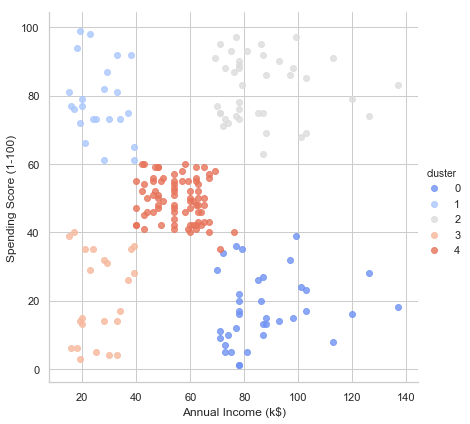

In [0]:
# plot the data 
df_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Annual Income (k$)','Spending Score (1-100)',data=df_analyze, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)


** What are the cluster center vectors?
<br> How many points are there in each of the Clusters?**


In [0]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(df.drop(['CustomerID','Genre'],axis=1))
# kmeans_4.fit(df.drop('id',axis=1))
print(kmeans_4.cluster_centers_)	
unique, counts = np.unique(kmeans_4.labels_, return_counts=True)

kmeans_4.cluster_centers_
print(dict(zip(unique, counts)))

[[32.69230769 86.53846154 82.12820513]
 [44.89473684 48.70526316 42.63157895]
 [40.39473684 87.         18.63157895]
 [24.82142857 28.71428571 74.25      ]]
{0: 39, 1: 95, 2: 38, 3: 28}


** Plot the Cluster Data **


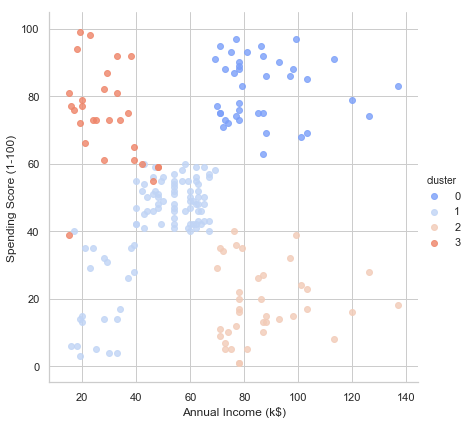

In [0]:
# plot the data 
df_analyze['cluster'] = kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('Annual Income (k$)','Spending Score (1-100)',data=df_analyze, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)